In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
data = pd.read_csv("D:\Mars Rover Manipal\Project 3\Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [46]:
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [47]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [48]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [49]:
df=data.drop(['country'],axis=1)

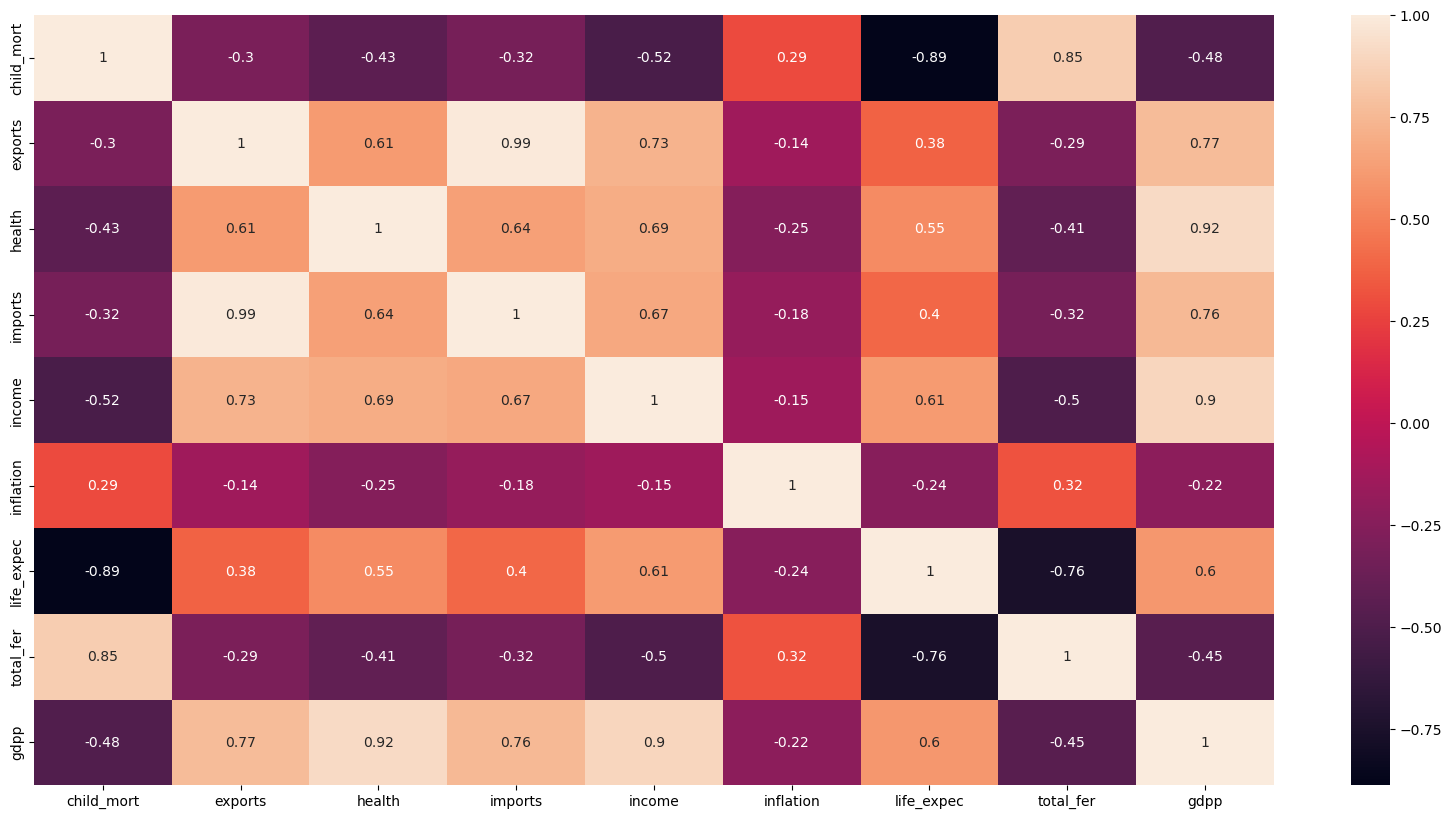

In [50]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

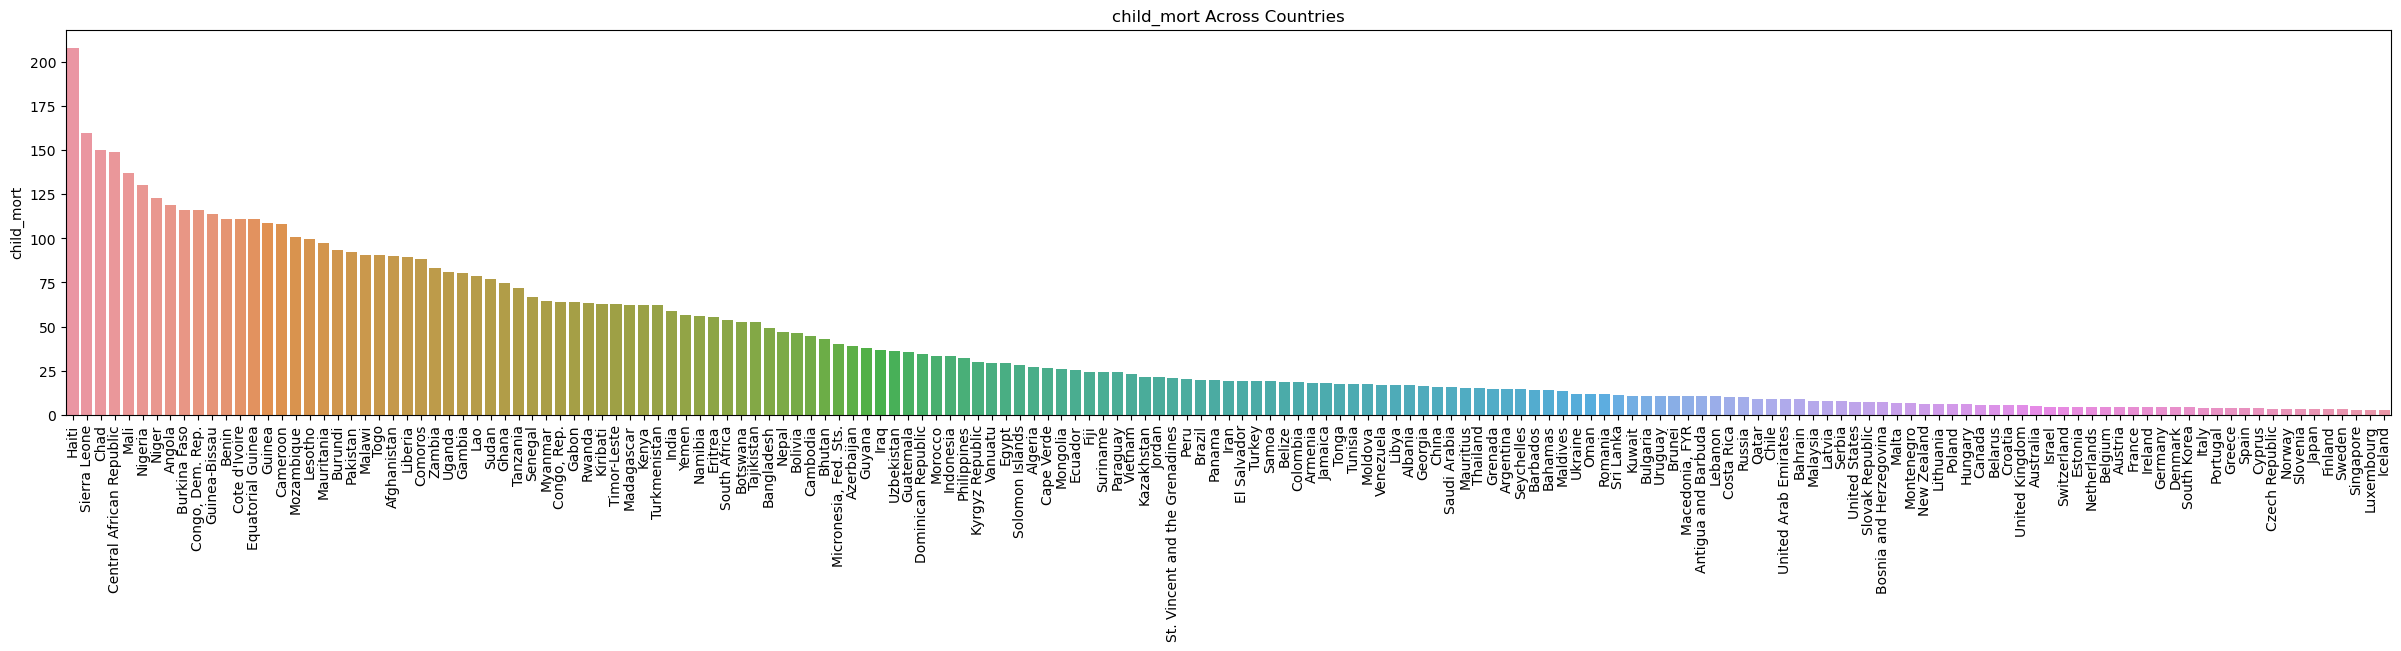

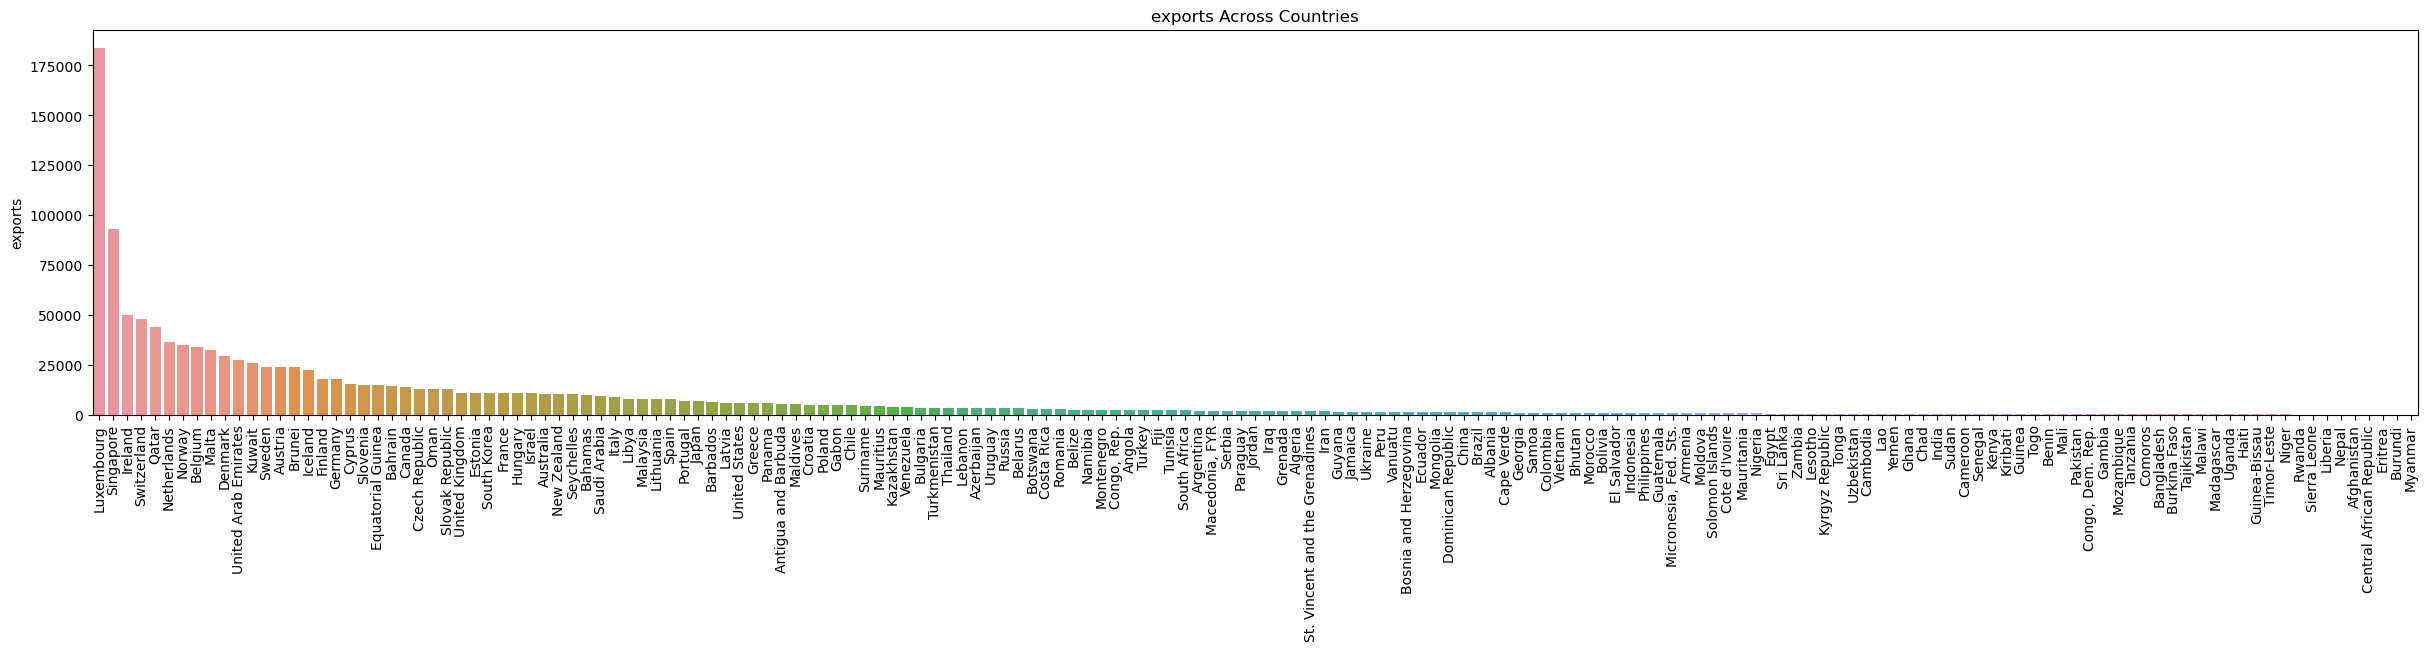

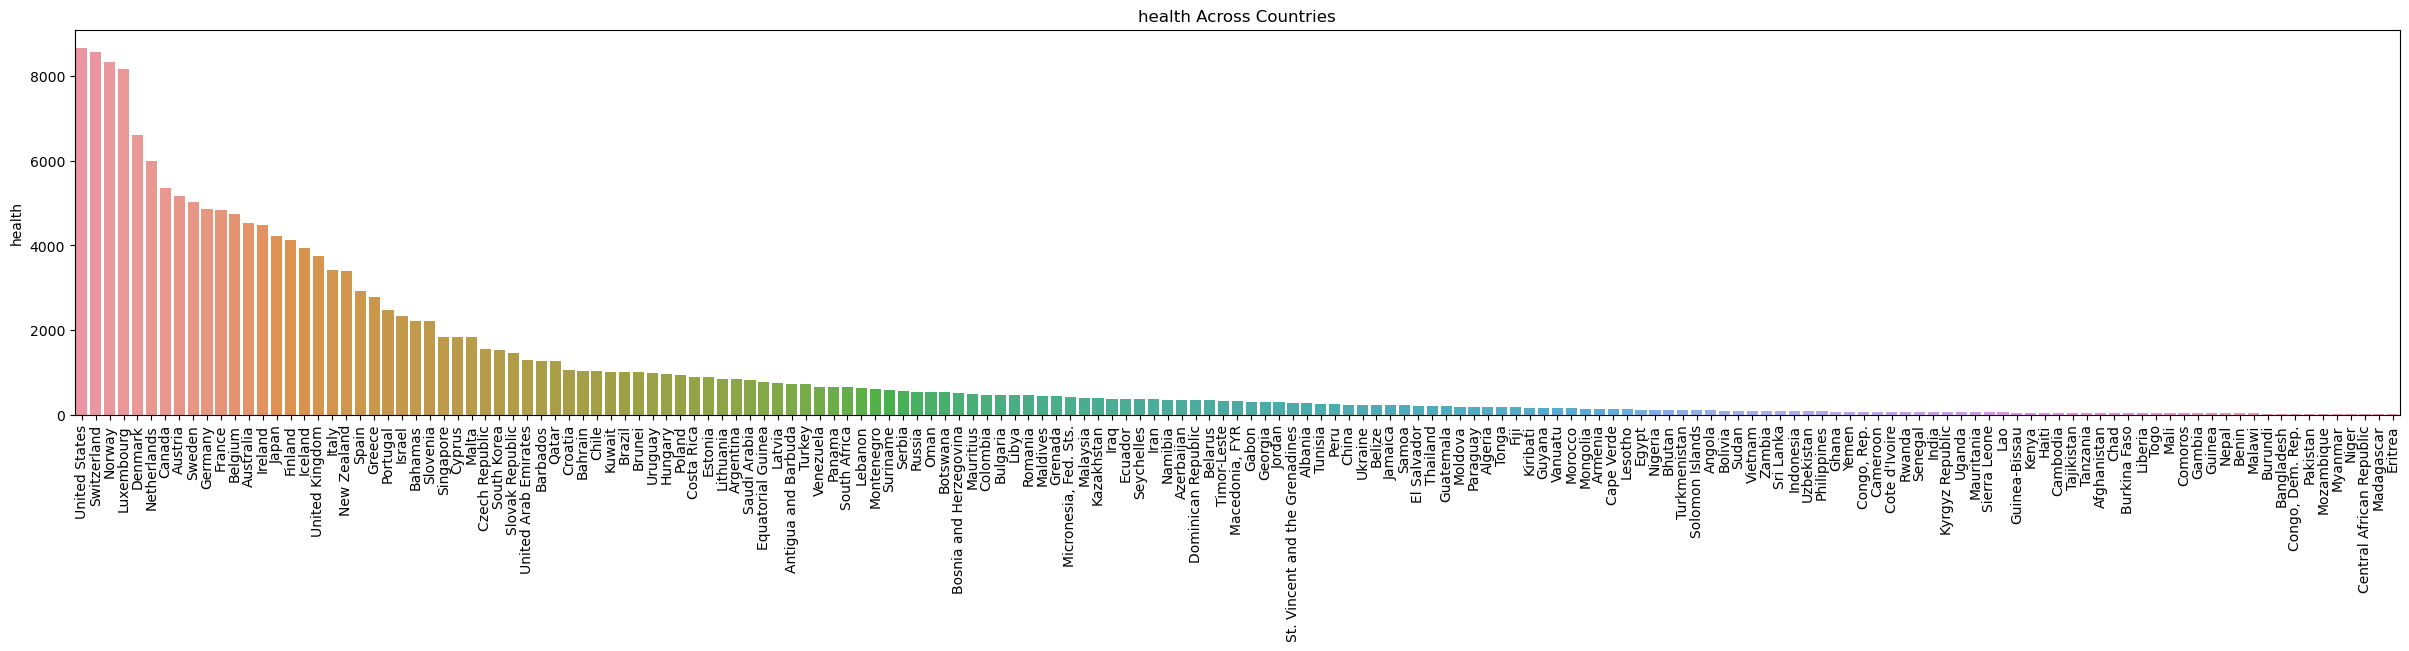

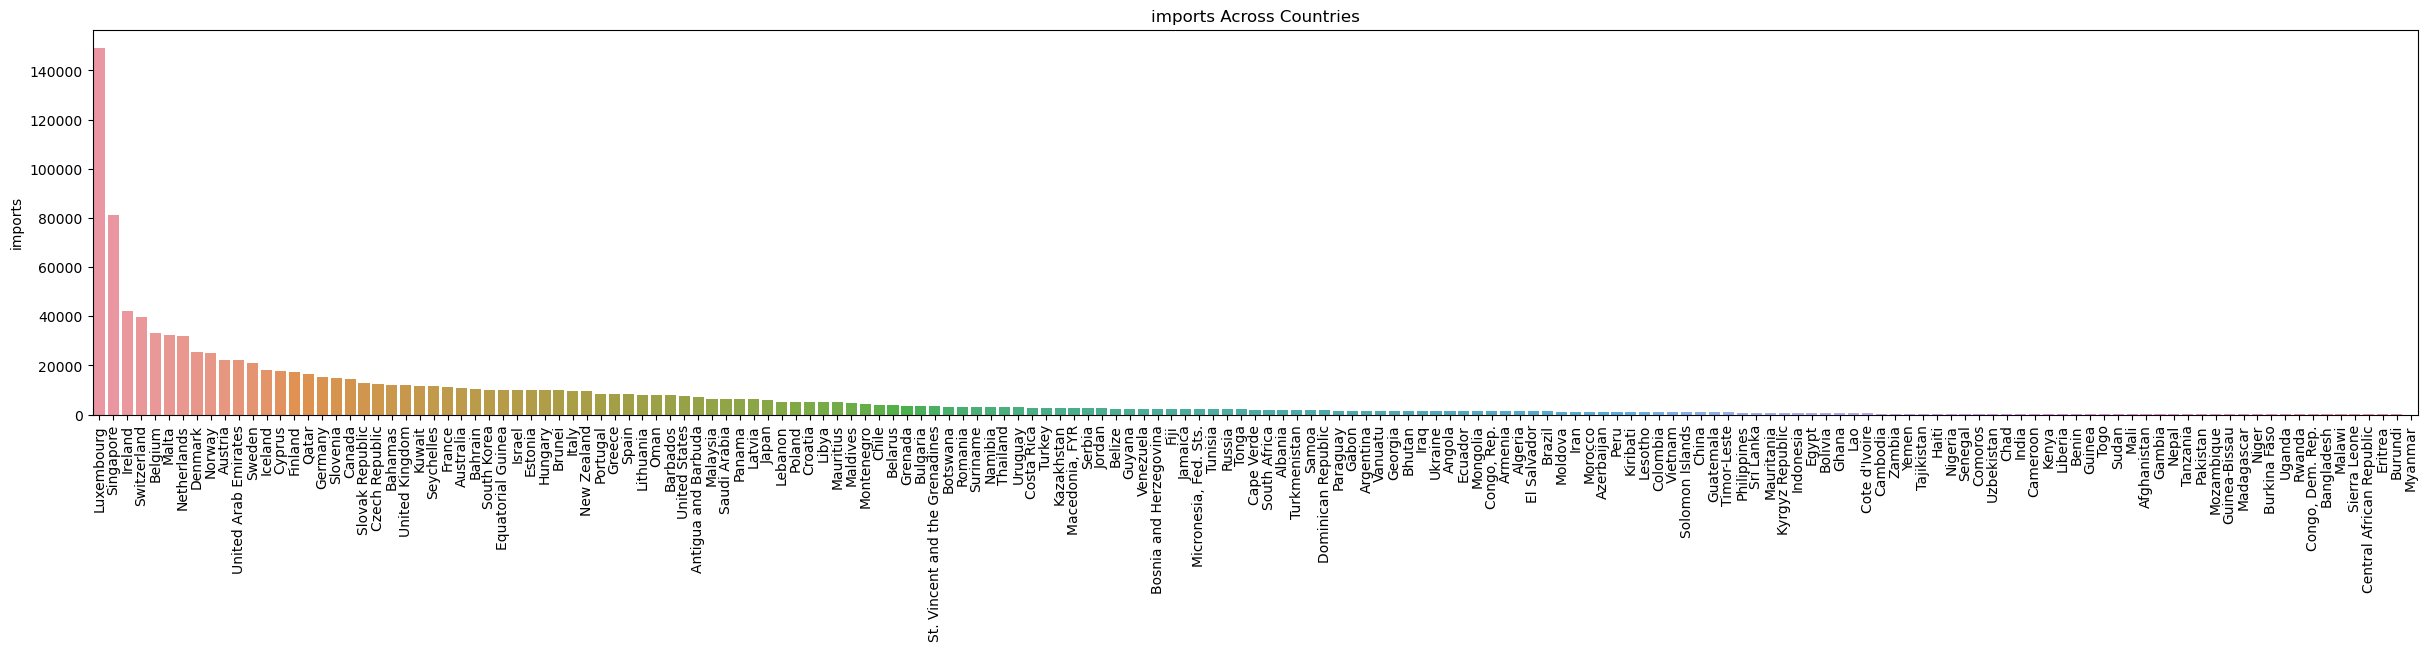

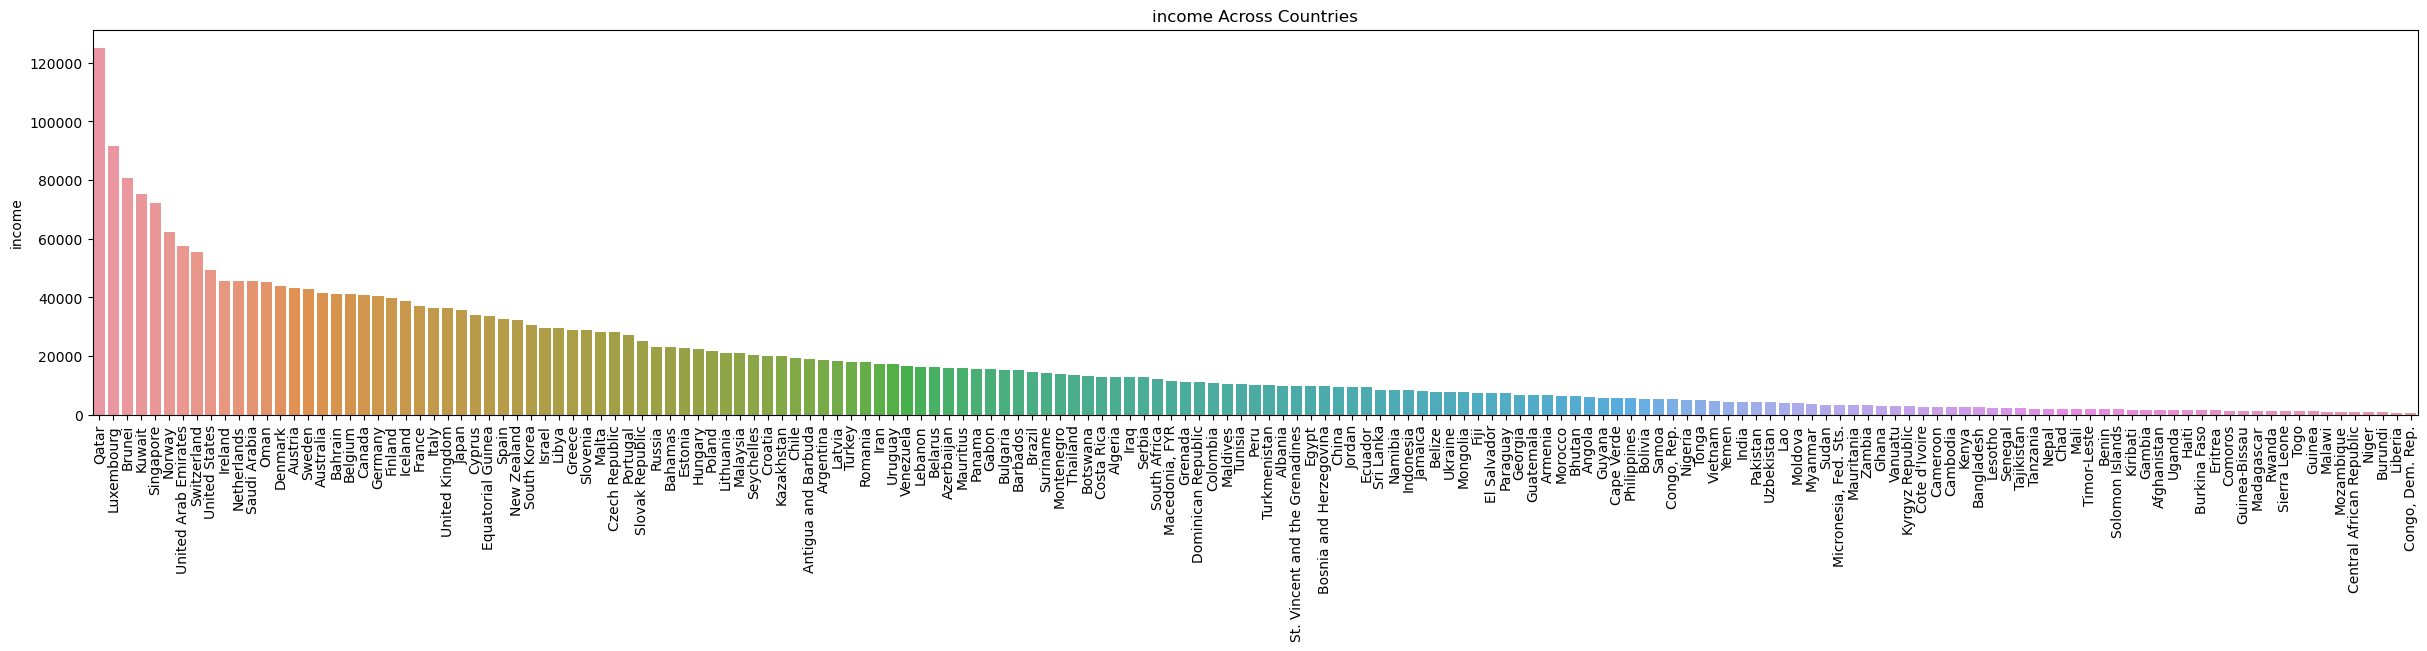

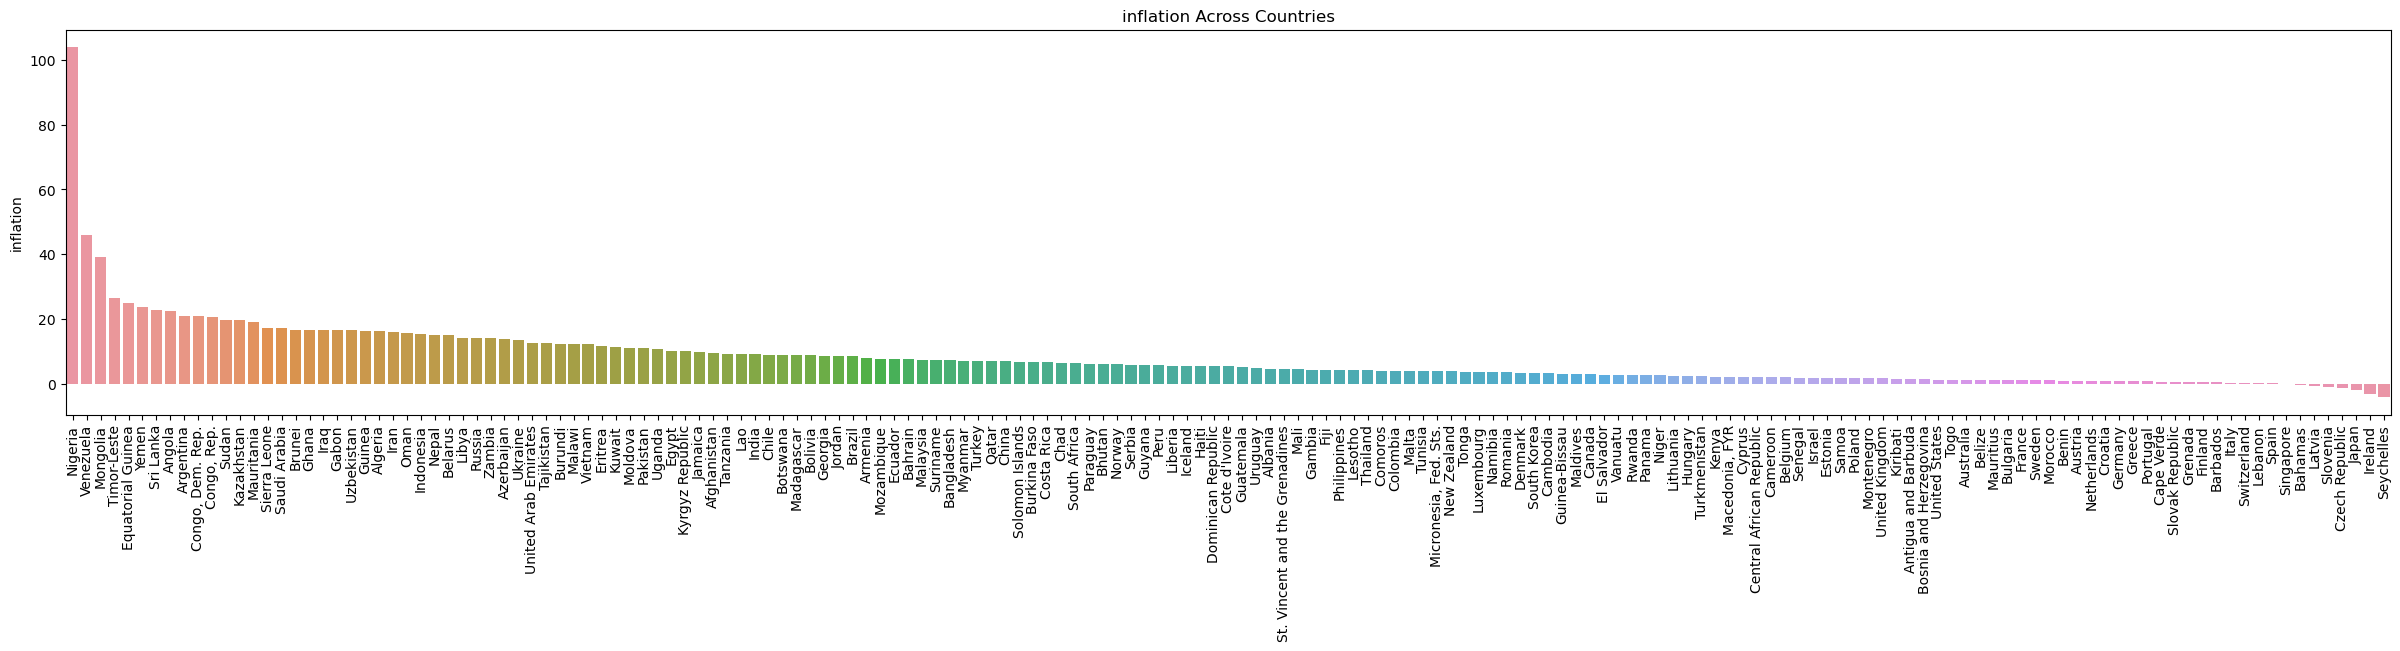

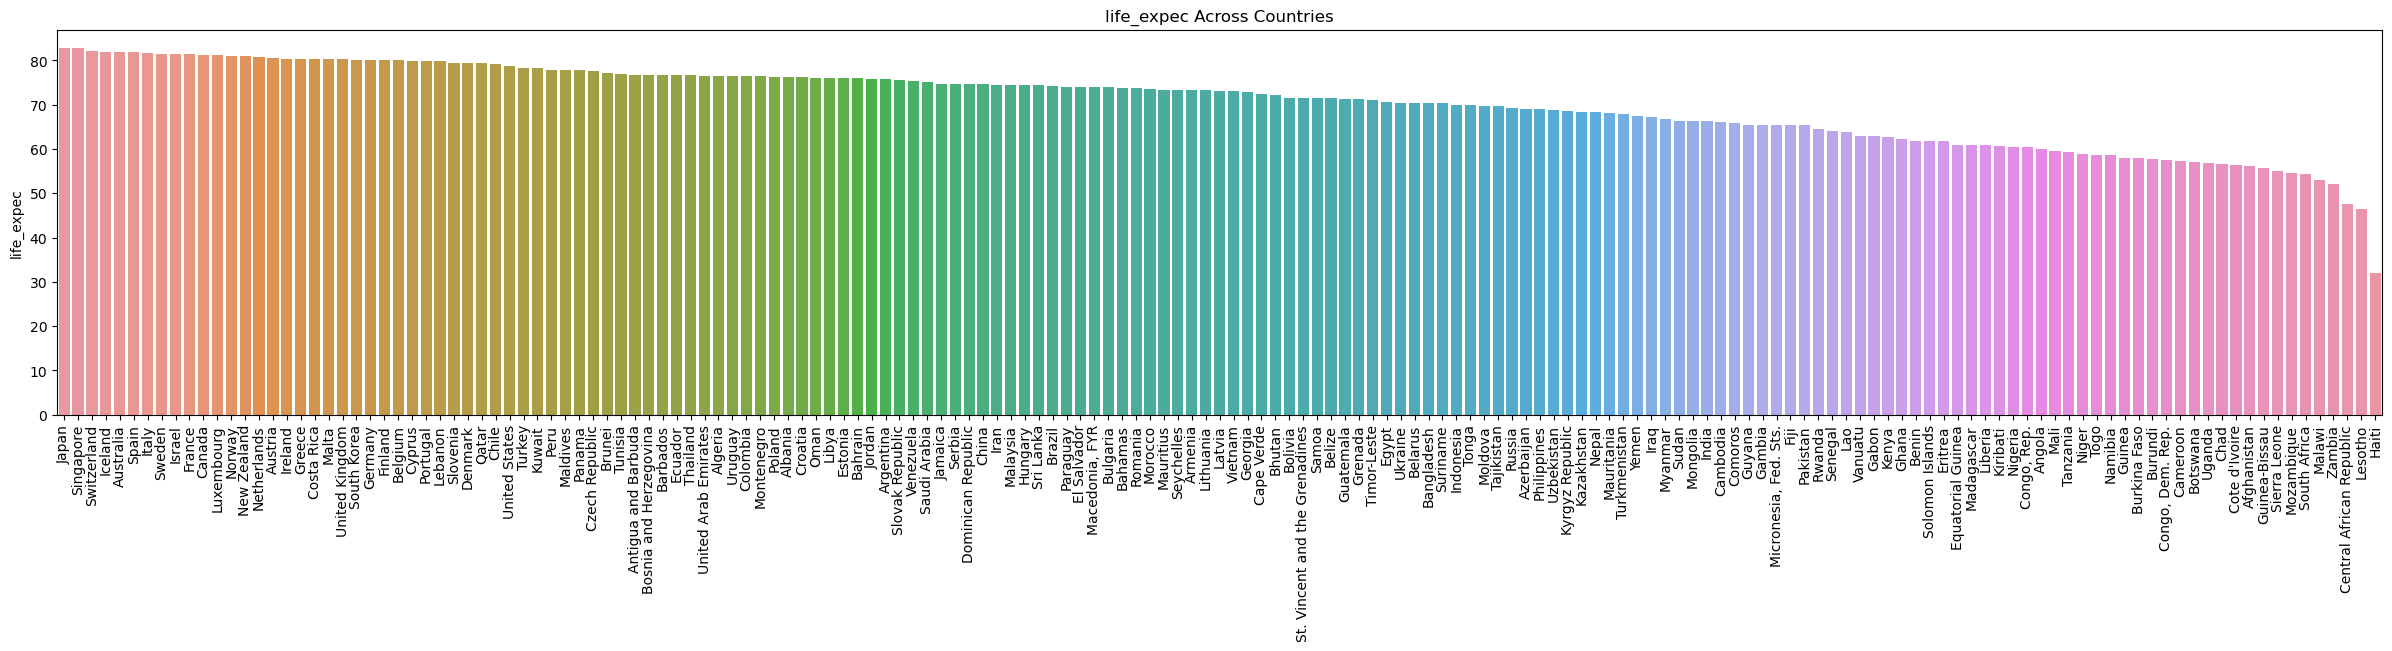

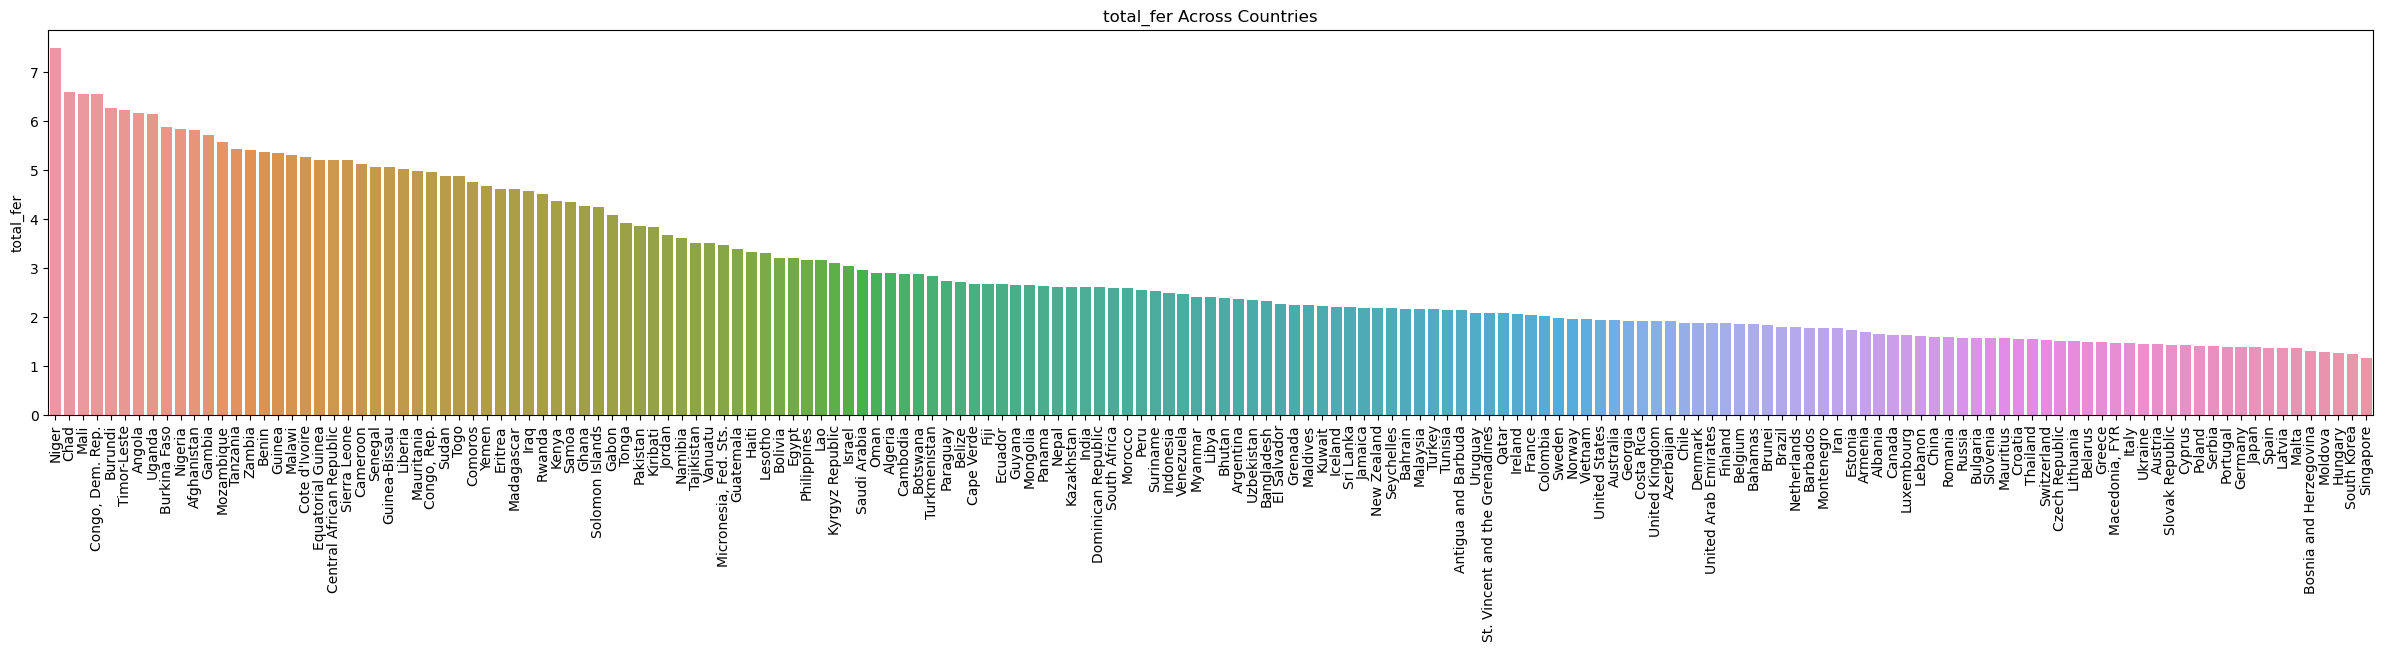

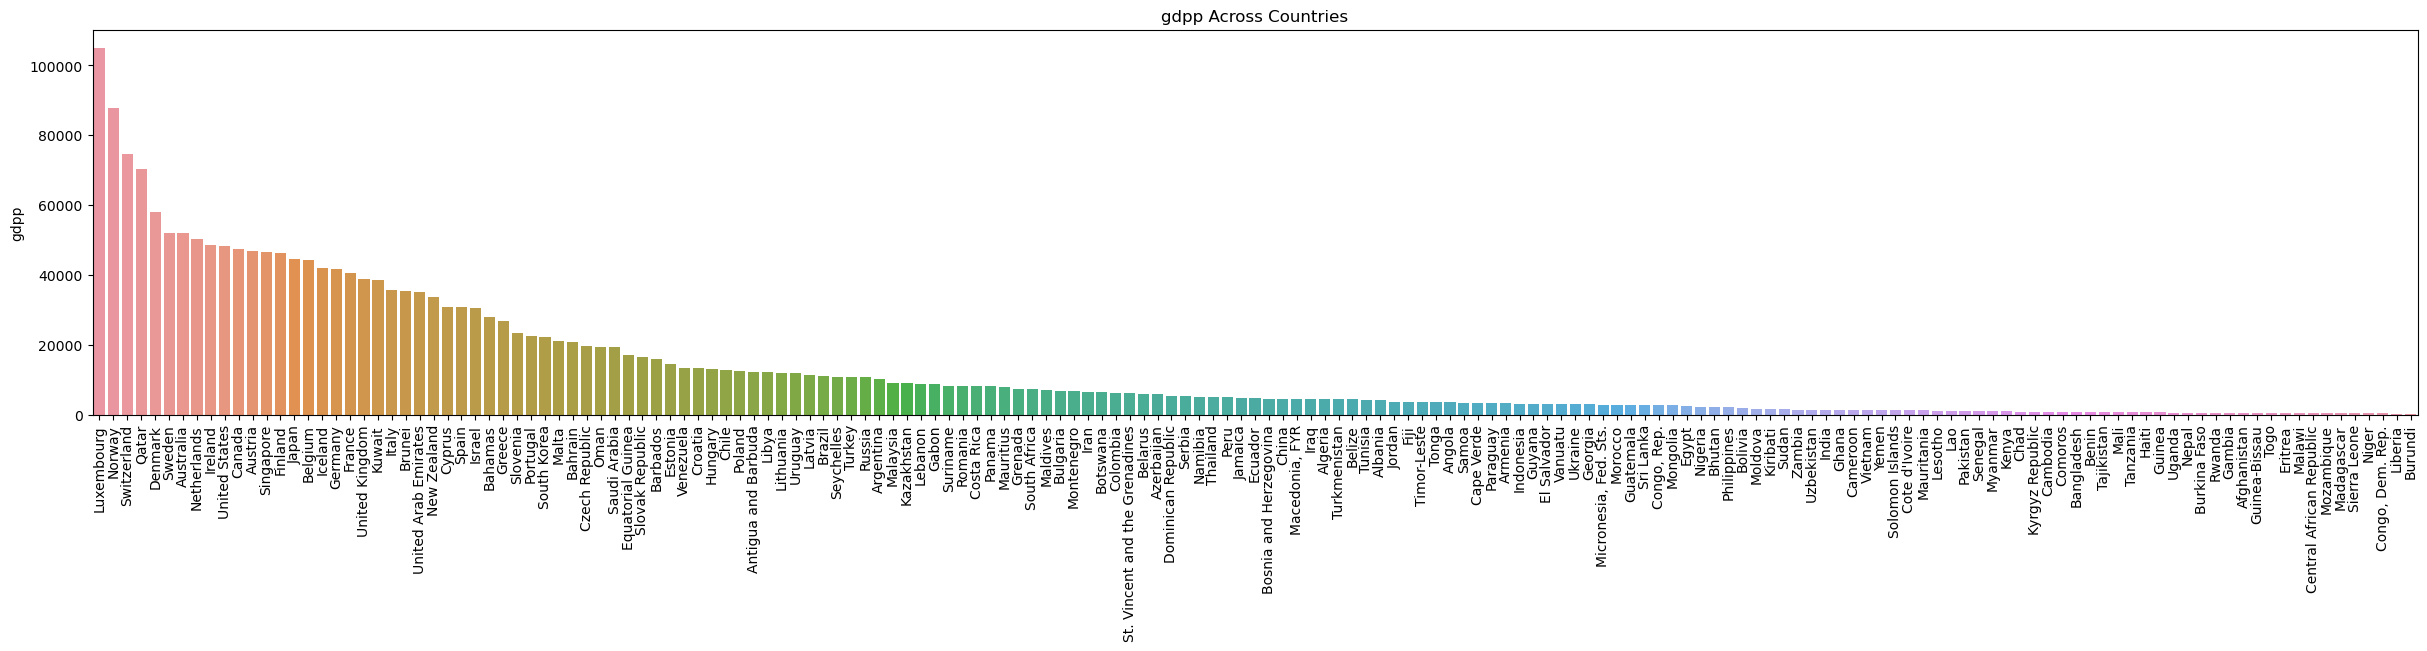

In [51]:
features_to_plot = ["child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]

for i in features_to_plot:
    plt.figure(figsize = (30,5))
    j = data[['country',i]].sort_values(i, ascending = False)
    ax = sns.barplot(x='country', y=i, data= j)
    ax.set(xlabel = '', ylabel= i)
    plt.title(f"{i} Across Countries")
    plt.xticks(rotation=90)
    plt.show()

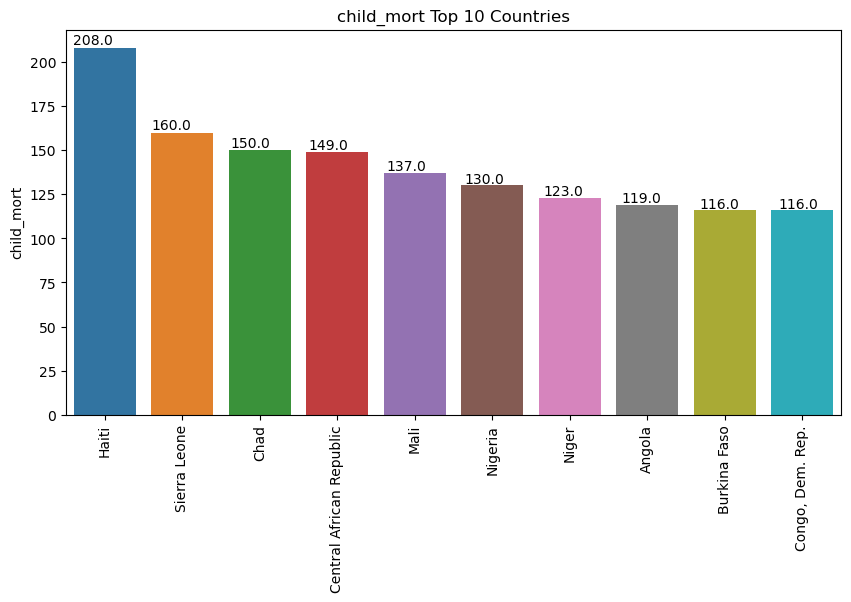

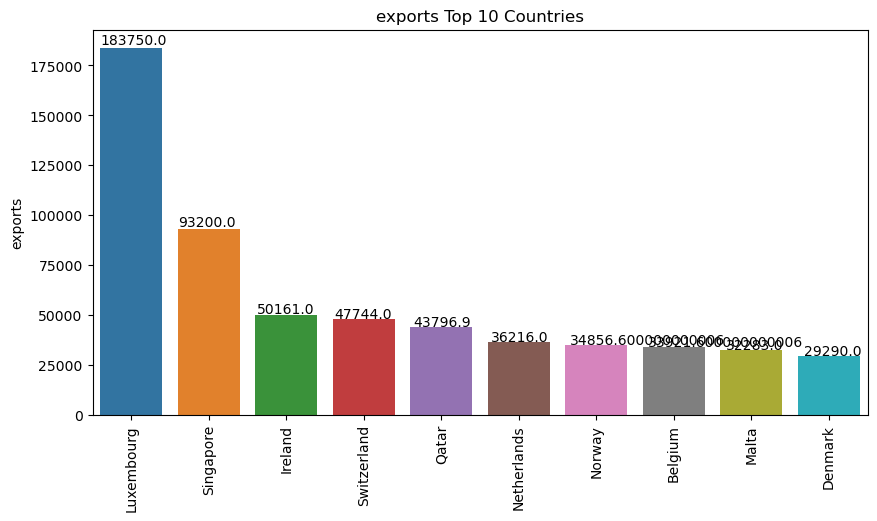

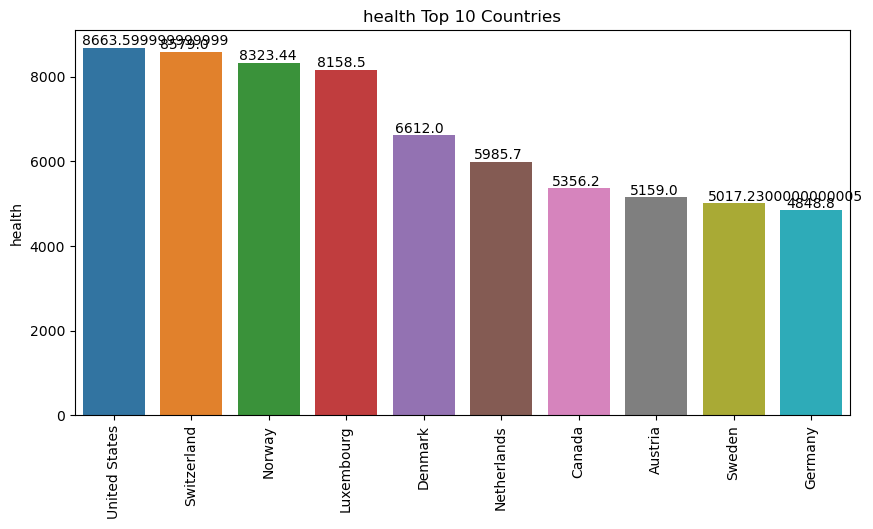

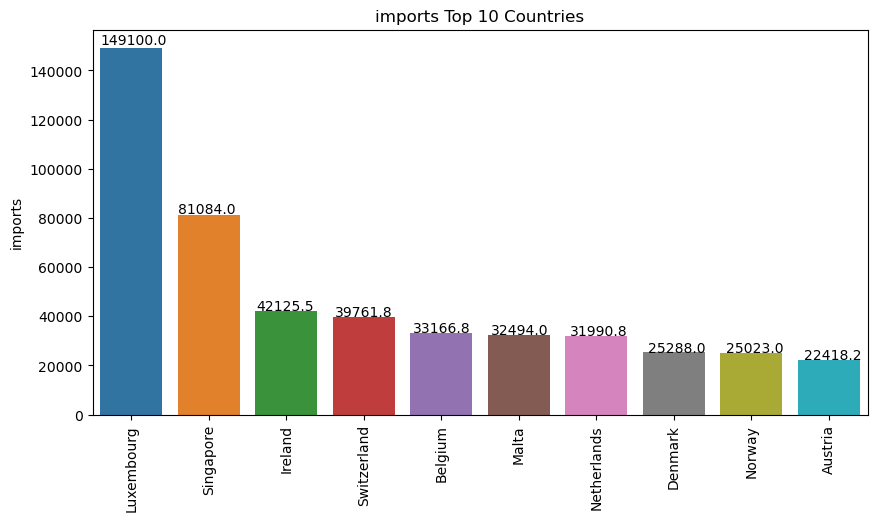

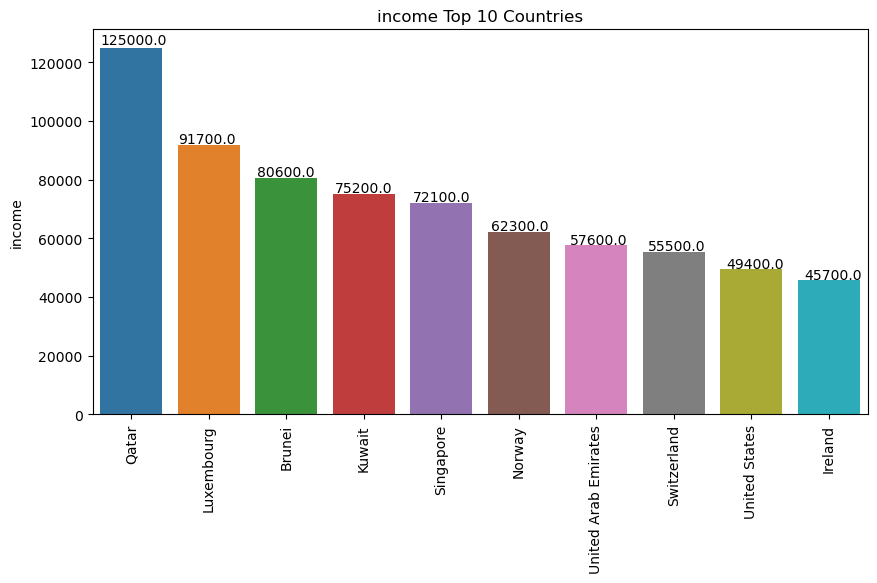

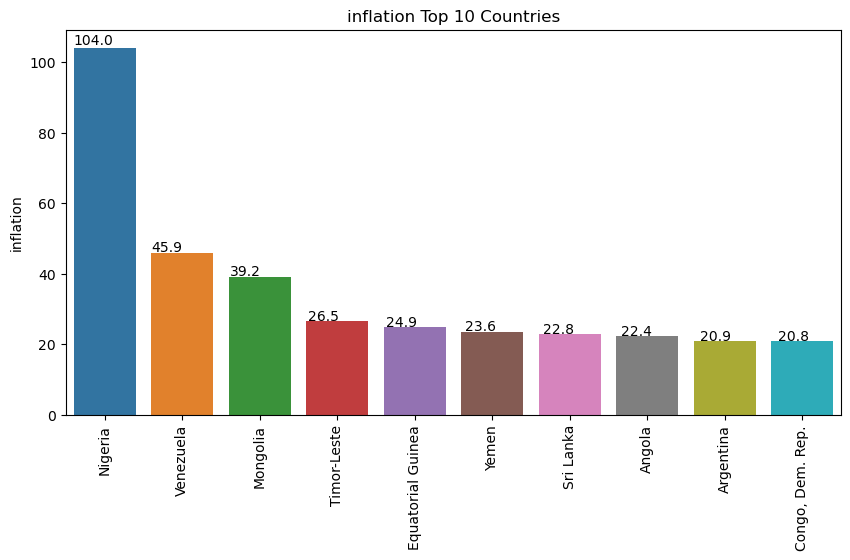

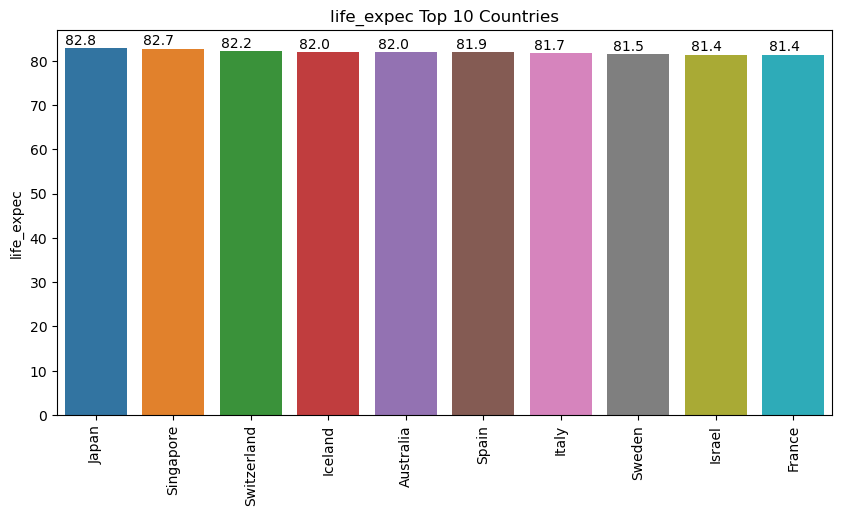

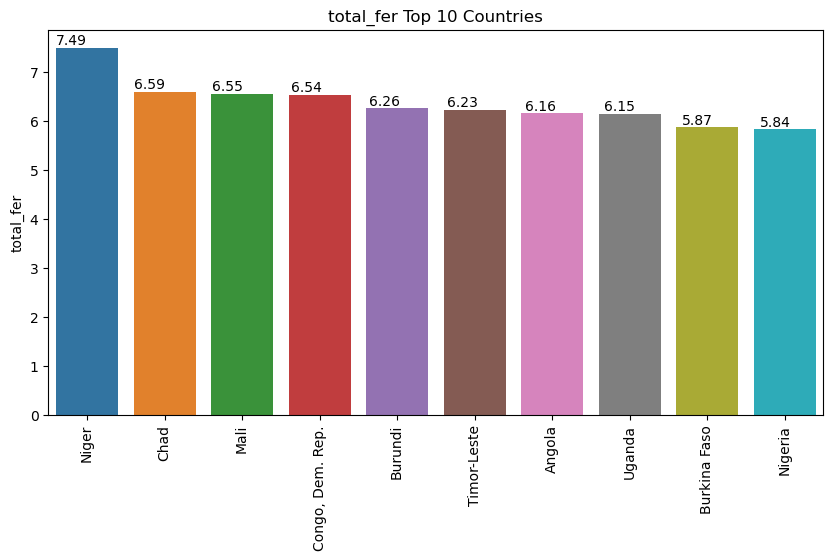

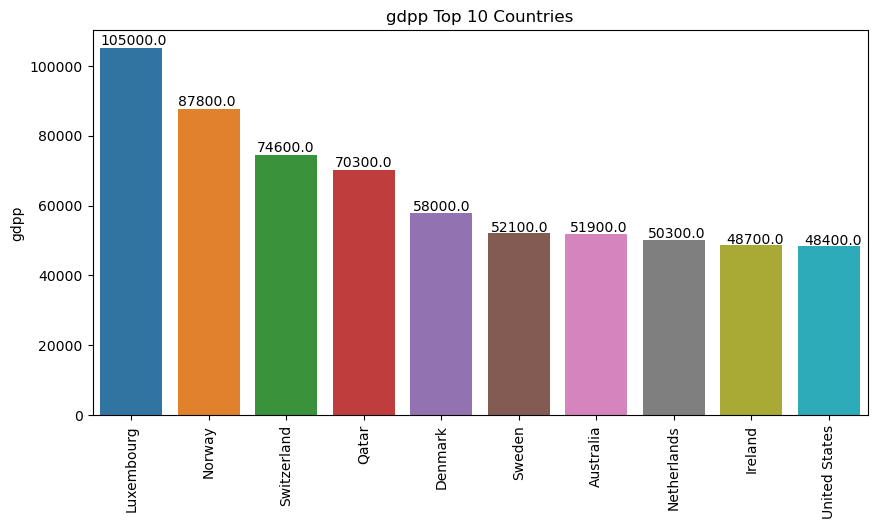

In [52]:
for i in features_to_plot:
    plt.figure(figsize = (10,5))
    top10 = data[['country',i]].sort_values(i, ascending = False).head(10)
    ax = sns.barplot(x='country', y=i, data= top10)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax.set(xlabel = '', ylabel=i)
    plt.title(f"{i} Top 10 Countries")
    plt.xticks(rotation=90)
    plt.show()

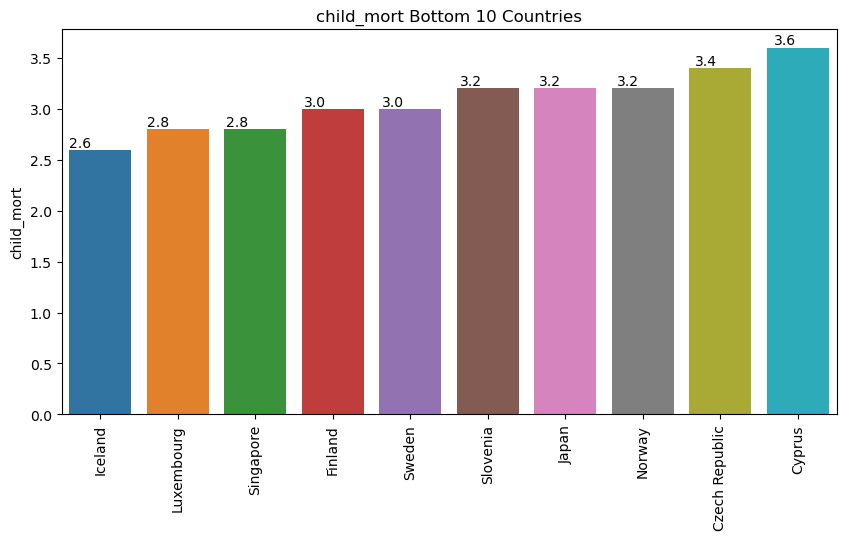

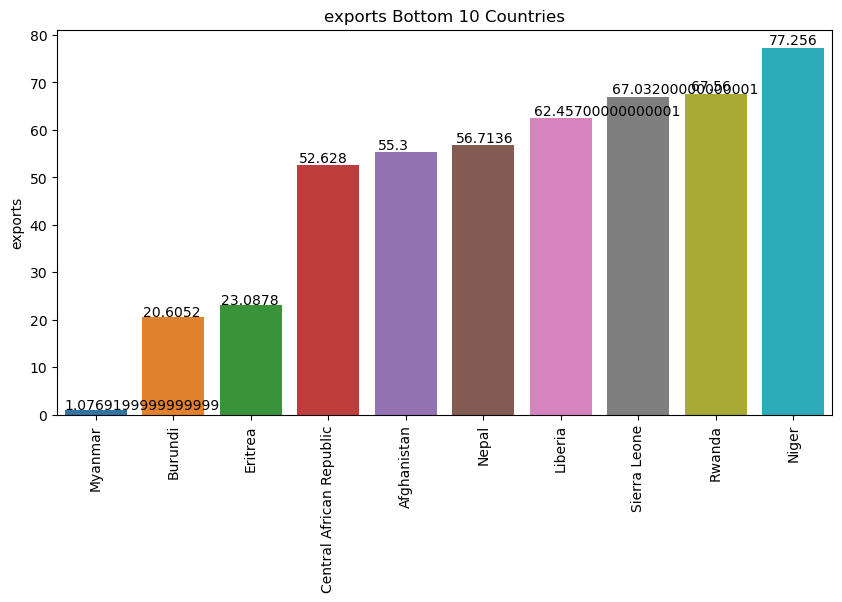

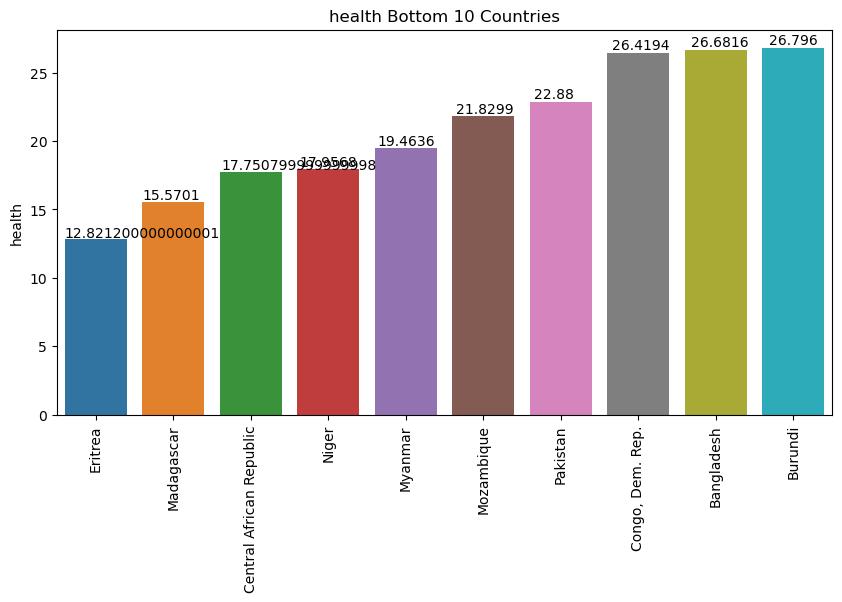

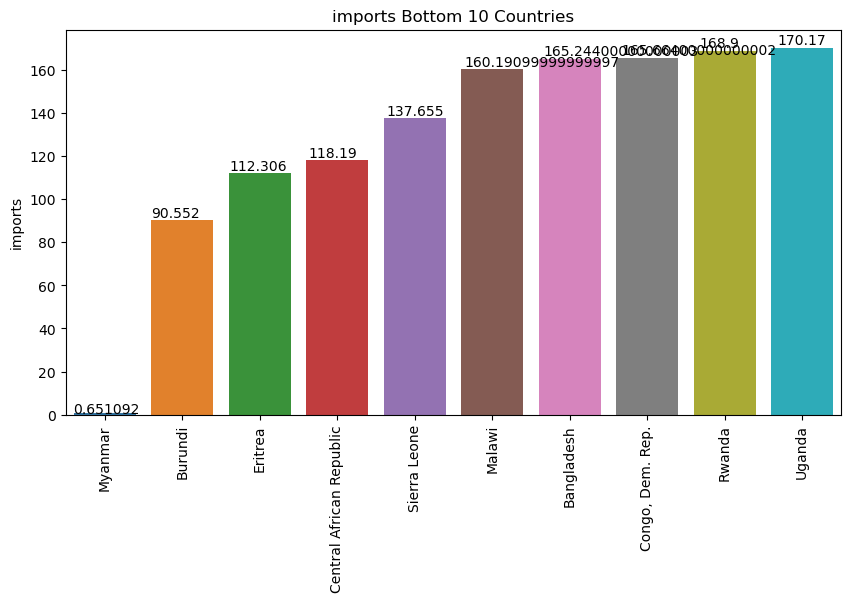

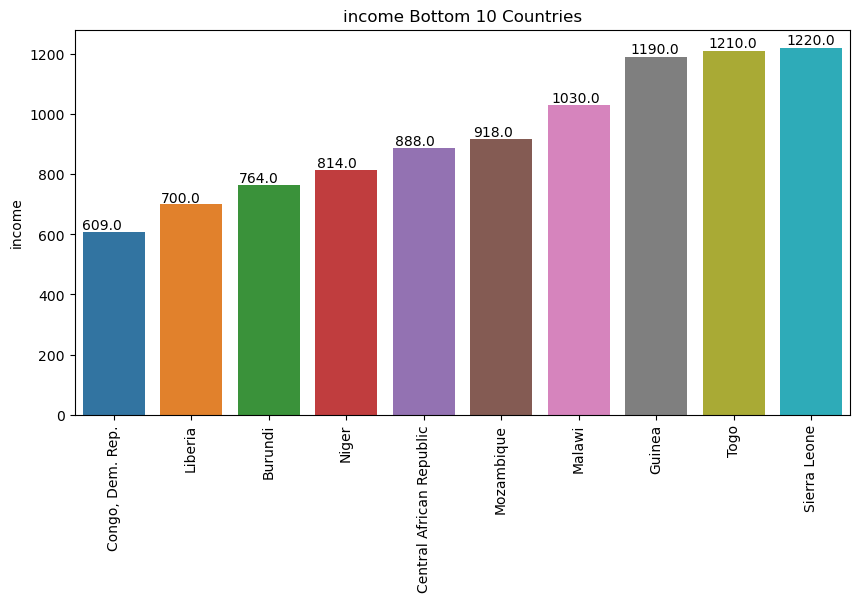

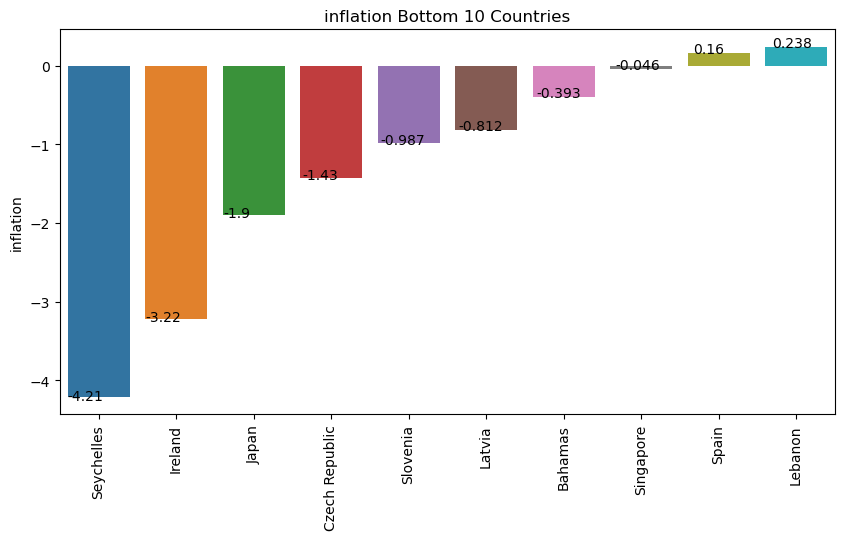

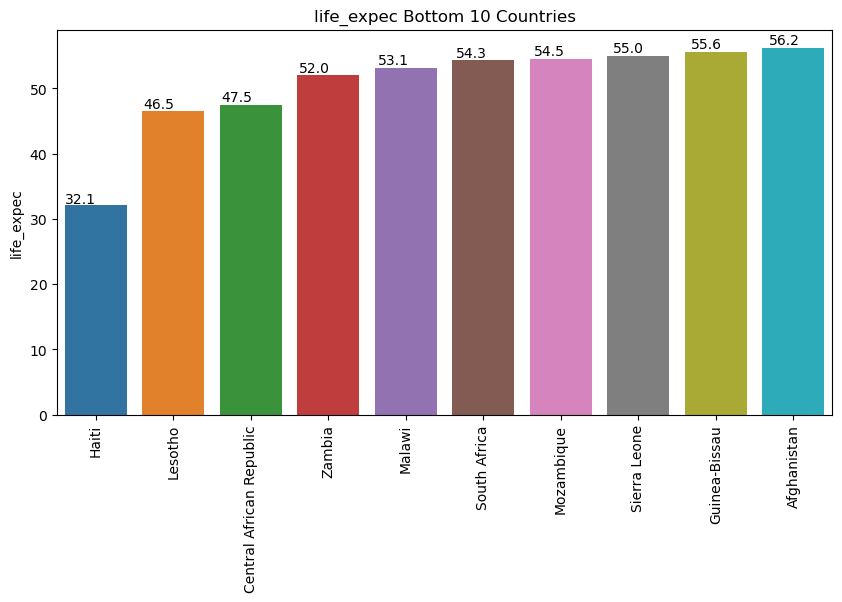

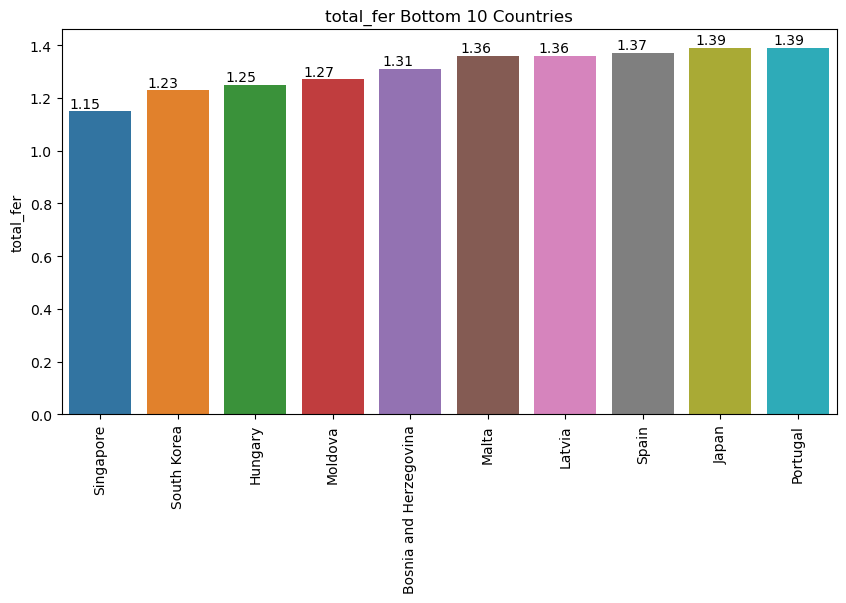

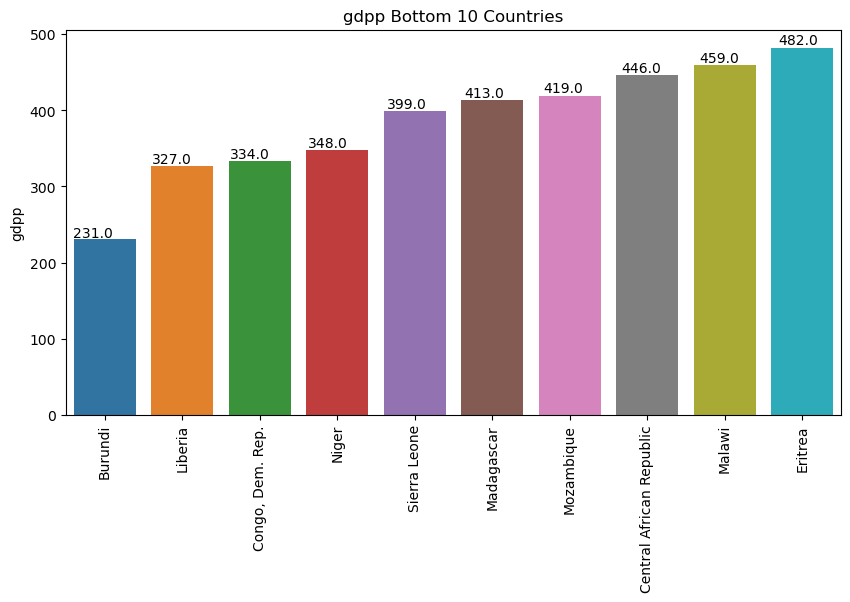

In [53]:
for i in features_to_plot:
    plt.figure(figsize = (10,5))
    bottom10 = data[['country',i]].sort_values(i, ascending = True).head(10)
    ax = sns.barplot(x='country', y=i, data=bottom10)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax.set(xlabel = '', ylabel=i)
    plt.title(f"{i} Bottom 10 Countries")
    plt.xticks(rotation=90)
    plt.show()

In [54]:
mean_values = np.mean(df, axis=0)
std_dev_values = np.std(df, axis=0)
standardized_data = (df - mean_values) / std_dev_values
standardized_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.336864,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,-0.361463,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.392166,-0.550596,-0.418479,-0.658924,1.500916,-0.344633,1.140944,-0.637754


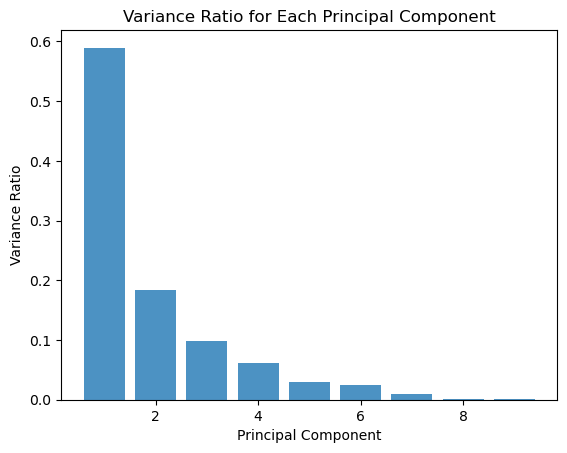

In [55]:
cov_matrix = np.cov(standardized_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

variance_ratio = eigenvalues / np.sum(eigenvalues)

plt.bar(np.arange(1, len(variance_ratio) + 1), variance_ratio, align='center', alpha=0.8)
plt.title('Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

In [56]:
cumulative_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)
num_components = 5
selected_components = eigenvectors[:, :num_components]
pca_result = np.dot(standardized_data, selected_components)

In [57]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, num_components + 1)])
pca_df['Country'] = data['country']

print("\nPCA DataFrame:")
pca_df


PCA DataFrame:


,PC1,PC2,PC3,PC4,PC5,Country
0,-2.635575,1.472267,0.549489,0.242326,0.023530,Afghanistan
1,-0.024206,-1.429892,0.014123,-0.450645,-0.125821,Albania
2,-0.459557,-0.675495,-0.959355,-0.218456,-0.113275,Algeria
3,-2.722630,2.172332,-0.600215,0.433978,0.005433,Angola
4,0.648597,-1.023437,0.257430,-0.289201,0.072694,Antigua and Barbuda
...,...,...,...,...,...,...
162,-1.175210,-0.275652,0.667131,-0.279628,-0.119733,Vanuatu
163,-0.314228,-0.016266,-3.680273,-0.011835,-0.460468,Venezuela
164,-0.594449,-1.076335,-0.528875,-0.508854,-0.328297,Vietnam
165,-1.802372,0.588729,-1.180851,0.020241,-0.315724,Yemen


In [58]:
pca_df=pca_df.drop(['Country'],axis=1)

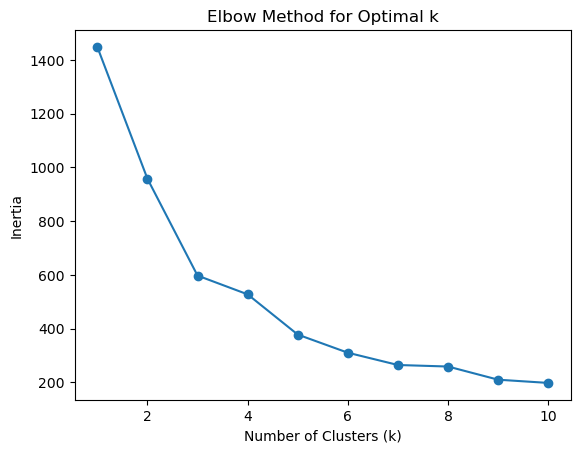

In [59]:
def k_means(X, k, num_iterations=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(num_iterations):
        distances = np.linalg.norm(X - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distances, axis=0)
        
        centroids = np.array([np.mean(X[labels == j], axis=0) for j in range(k)])
    
    return labels

inertia_values = []
for k in range(1, 11):
    labels = k_means(pca_result, k)
    centroids = np.array([np.mean(pca_result[labels == j], axis=0) for j in range(k)])
    inertia_values.append(np.sum((pca_result - centroids[labels])**2))

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [60]:
optimal_k = 3

k_means_labels = k_means(pca_result, optimal_k)
centroids = np.array([np.mean(pca_result[k_means_labels == j], axis=0) for j in range(optimal_k)])

pca_df['Country'] = data['country']
pca_df['Cluster'] = k_means_labels

pca_df['Cluster'].replace(2, 3, inplace=True)
pca_df['Cluster'].replace(1, 2, inplace=True)
pca_df['Cluster'].replace(0, 1, inplace=True)

pca_df

,PC1,PC2,PC3,PC4,PC5,Country,Cluster
0,-2.635575,1.472267,0.549489,0.242326,0.023530,Afghanistan,2
1,-0.024206,-1.429892,0.014123,-0.450645,-0.125821,Albania,3
2,-0.459557,-0.675495,-0.959355,-0.218456,-0.113275,Algeria,3
3,-2.722630,2.172332,-0.600215,0.433978,0.005433,Angola,2
4,0.648597,-1.023437,0.257430,-0.289201,0.072694,Antigua and Barbuda,3
...,...,...,...,...,...,...,...
162,-1.175210,-0.275652,0.667131,-0.279628,-0.119733,Vanuatu,3
163,-0.314228,-0.016266,-3.680273,-0.011835,-0.460468,Venezuela,3
164,-0.594449,-1.076335,-0.528875,-0.508854,-0.328297,Vietnam,3
165,-1.802372,0.588729,-1.180851,0.020241,-0.315724,Yemen,2


In [61]:
def silhouette_score(X, labels):
    num_samples = len(X)
    a = np.zeros(num_samples)
    b = np.zeros(num_samples)

    for i in range(num_samples):
        cluster_mask = labels == labels[i]
        a[i] = np.mean(np.linalg.norm(X[i] - X[cluster_mask], axis=1))

        b_i = float('inf')
        for j in range(optimal_k):
            if j != labels[i]:
                b_i = min(b_i, np.mean(np.linalg.norm(X[i] - X[labels == j], axis=1)))

        b[i] = b_i

    silhouette_scores = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_scores)

def sse(X, labels, centroids):
    return np.sum((X - centroids[labels])**2)

def calinski_harabasz_index(X, labels, centroids):
    num_clusters = len(centroids)
    overall_centroid = np.mean(X, axis=0)

    between_cluster_variance = np.sum([
        np.sum(labels == i) * np.linalg.norm(centroids[i] - overall_centroid)**2
        for i in range(num_clusters)
    ])

    within_cluster_variance = np.sum([
        np.sum(np.linalg.norm(X[labels == i] - centroids[i], axis=1)**2)
        for i in range(num_clusters)
    ])

    return (between_cluster_variance / (num_clusters - 1)) / (within_cluster_variance / (len(X) - num_clusters))

In [62]:
silhouette = silhouette_score(pca_result, k_means_labels)
sse_value = sse(pca_result, k_means_labels, centroids)
ch_index = calinski_harabasz_index(pca_result, k_means_labels, centroids)


print(f'Silhouette Score: {silhouette}')
print(f'SSE: {sse_value}')
print(f'Calinski-Harabasz Index: {ch_index}')

Silhouette Score: 0.46457526327820553
SSE: 597.4851665062641
Calinski-Harabasz Index: 116.83918127605862
